In [45]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch 
import torch.nn as nn
import torch.nn.functional as F
%matplotlib inline

In [25]:
img_path = '../Neural_Networks_Scratch/cat.jpeg'

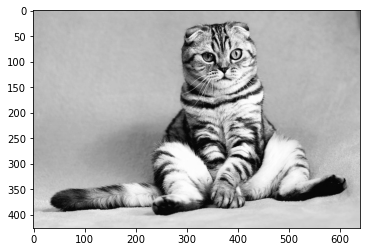

In [27]:
#Loading the colored image
rgb_img = cv2.imread(img_path)
# Converting to grayscale
gray_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2GRAY)
#Normalizing 
gray_img = gray_img.astype('float32')/255
# plot the image
plt.imshow(gray_img, cmap ='gray')
plt.show()

In [29]:
gray_img.shape

(426, 640)

**Let's define our filters**

In [33]:
filter_vals = np.array([[-1,-1,1,1],[-1,-1,1,1],[-1,-1,1,1],[-1,-1,1,1]])
print('Filter Shape : ', filter_vals.shape)

Filter Shape :  (4, 4)


**Define four filters for vertical and horizontal edge detection which are just linear combination of filter_vals**

In [42]:
filter_1 = filter_vals
filter_2 = -(filter_1)
filter_3 = filter_1.T
filter_4 = -(filter_3)
filters = np.array([filter_1,filter_2,filter_3,filter_4])

**Let's visualize our 4 filters**

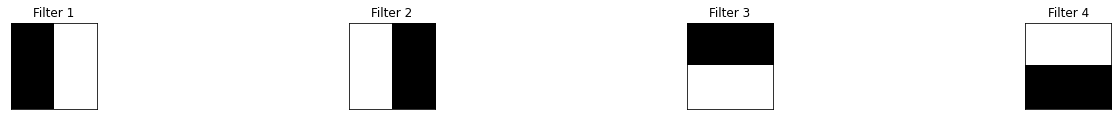

In [58]:
# Visualize all of the filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1,xticks=[], yticks=[]) #fig.add_subplot(111) is equivalent to fig.add_subplot(1,1,1) which means 1x1 grid and first subplot
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

**Let's define our model**

*Neural Network with one convolutional layer and 4 filters*

In [94]:
class net(nn.Module):
    
    def __init__(self, weight):
        super().__init__()
        #initialize weights of convolutional layer to be weights of 4 defined filter
        k_height, k_width = weight.shape[2:]
        self.conv = nn.Conv2d(1,4, kernel_size =(k_height,k_width), bias =False)
        #learnable weights of module of shape (out_channels, in_channels/groups, kernel_size[0], kernel_size[1])
        self.conv.weight = torch.nn.Parameter(weight)
    def forward(self, x):
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        return conv_x, activated_x

In [95]:
# Instantiate model and assign weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = net(weight)

In [96]:
print(model)

net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
)


In [97]:
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # Grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

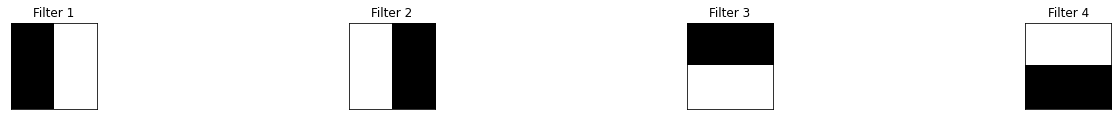

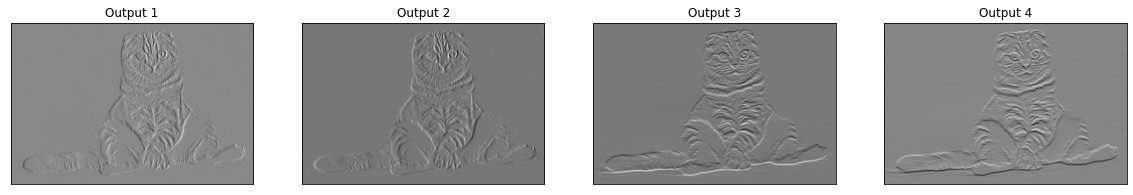

In [100]:
# Convert the image into an input tensor
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)
# Get the convolutional layer (pre and post activation)
conv_layer, activated_layer = model(gray_img_tensor)
# Visualize the output of a convolutional layer
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1,xticks=[], yticks=[]) #fig.add_subplot(111) is equivalent to fig.add_subplot(1,1,1) which means 1x1 grid and first subplot
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
viz_layer(conv_layer)

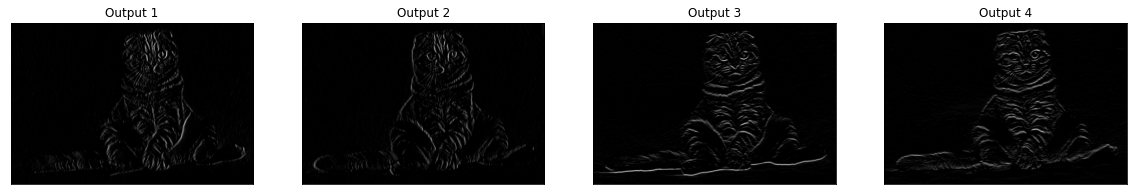

In [101]:
viz_layer(activated_layer)

**Relu non-linearity turns all the negative pixels to 0 (i.e. black)